In [1]:
# Imports
import time
import math
import sys
import numpy as np
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
from PIL import Image
from scipy import ndimage
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict
from fc_utils import *
from cnn_utils import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(2)

/Users/samshen/anaconda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# train_data_orig, train_labels_orig, eval_data_orig, eval_labels_orig, classes = load_dataset()
# classes = 6
# train_labels = np.squeeze(train_labels_orig)
# train_labels_old = train_labels
# train_labels = one_hot_label(classes, train_labels_old)
# eval_labels = np.squeeze(eval_labels_orig)
# eval_labels_old = eval_labels
# eval_labels = one_hot_label(classes, eval_labels_old)
# # Flatten the training and test images
# train_data = train_data_orig.reshape(train_data_orig.shape[0], -1).T
# eval_data = eval_data_orig.reshape(eval_data_orig.shape[0], -1).T
# # Normalize image vectors
# train_data = train_data/255.
# eval_data = eval_data/255.
# features = train_data.shape[0]
# print(train_data.shape)

In [3]:
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
classes = 10
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
train_labels = one_hot_label(classes, train_labels)
eval_data = mnist.test.images # Returns np.array
eval_labels_old = np.asarray(mnist.test.labels, dtype=np.int32)
eval_labels = one_hot_label(classes, eval_labels_old)
features = train_data.shape[0]

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
print(train_data.shape)
print(eval_data.shape)
# Input Layer
input_layer = train_data.reshape(55000,1,28,28)
eval_data = eval_data.reshape(10000,1,28,28)
#plt.imshow(input_layer[0,0])

(55000, 784)
(10000, 784)


## Plan
**input layer:** mx28x28x1

**conv layer1 + Relu:** mx28x28x32

**pool layer1:** mx14x14x32

**conv layer2 + Relu:** mx14x14x64

**pool layer2:** mx7x7x64

**flatten:** mx3136

**fc layer1:** mx1024

**output layer:** mx10

**softmax:** mx10

Cost after iteration 0, batch 0: 2.372860
Cost after iteration 0, batch 1: 2.446621
Cost after iteration 0, batch 2: 2.354514
Cost after iteration 0, batch 3: 2.181160
Cost after iteration 0: 2.181160
Cost after iteration 1, batch 0: 2.015779
Cost after iteration 1, batch 1: 1.998521
Cost after iteration 1, batch 2: 1.845226
Cost after iteration 1, batch 3: 1.814837
Cost after iteration 1: 1.814837
Cost after iteration 2, batch 0: 1.737782
Cost after iteration 2, batch 1: 1.695536
Cost after iteration 2, batch 2: 1.607393
Cost after iteration 2, batch 3: 1.605544
Cost after iteration 2: 1.605544


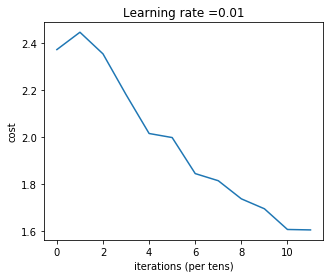

In [81]:
# training model
filter_dims = [(32,1,5,5),(64,32,5,5)]
layers_dims = [3136, 1024, classes] #  2-layer model
parameters, parameters_conv, grads, conv_grads = cnn_model(input_layer[0:256], train_labels[0:256], filter_dims, layers_dims, 
                                                           truncate = 0, batch_size = 64, learning_rate = 0.01, num_iterations = 3, print_cost = True)


In [82]:
#further training on the same model 
parameters, parameters_conv, grads, conv_grads = cnn_model(input_layer[0:2048], train_labels[:,0:2048], layers_dims, filter_dims, truncate = 0, batch_size = 128, learning_rate = 0.01, num_iterations = 5, parameters = parameters, parameters_conv = parameters_conv, print_cost = True)


Cost after iteration 0, batch 0: 1.542513
Cost after iteration 0, batch 1: 1.481691
Cost after iteration 0, batch 2: 1.478673
Cost after iteration 0, batch 3: 1.453832
Cost after iteration 0, batch 4: 1.438410
Cost after iteration 0, batch 5: 1.455917
Cost after iteration 0, batch 6: 1.467225
Cost after iteration 0, batch 7: 1.355944
Cost after iteration 0, batch 8: 1.185271
Cost after iteration 0, batch 9: 1.297841
Cost after iteration 0, batch 10: 1.358718
Cost after iteration 0, batch 11: 1.399593
Cost after iteration 0, batch 12: 1.203871
Cost after iteration 0, batch 13: 1.215044
Cost after iteration 0, batch 14: 1.269719
Cost after iteration 0, batch 15: 1.185950
Cost after iteration 0: 1.185950
Cost after iteration 1, batch 0: 1.269944
Cost after iteration 1, batch 1: 1.453226
Cost after iteration 1, batch 2: 1.132487
Cost after iteration 1, batch 3: 1.072631
Cost after iteration 1, batch 4: 1.053075
Cost after iteration 1, batch 5: 1.061016
Cost after iteration 1, batch 6: 1.15

KeyboardInterrupt: 

In [ ]:
train_labels.shape

In [ ]:
#eval_cnn_model(input_layer[0:256], train_labels[:,0:256], parameters, parameters_conv)

eval_cnn_model(eval_data[0:256], eval_labels[:,0:256], parameters, parameters_conv)

In [22]:
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
image_num = 88
predict_cnn(eval_data[image_num:image_num+1],parameters, parameters_conv)
print("actual value: " + str(eval_labels_old[image_num]))
data = mnist.test.images[image_num].reshape(28,28)
plt.imshow(data)

In [ ]:
out = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['b1'].reshape(-1), 
                     parameters_conv['W3'].reshape(-1), parameters_conv['b3'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

In [ ]:
out_m = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['b1'].reshape(-1), 
                     parameters_conv['W3'].reshape(-1), parameters_conv['b3'].reshape(-1)))
mu_m = np.mean(out_m)
variance_m = np.var(out_m)
sigma_m = math.sqrt(variance_m)
x_m = np.linspace(mu_m - 4 * sigma_m , mu_m + 4 * sigma_m , 1000)
plt.plot(y,mlab.normpdf(x_m, mu_m, sigma_m),'-', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_m)

In [ ]:
out = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

In [ ]:
out_m = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu_m = np.mean(out_m)
variance_m = np.var(out_m)
sigma_m = math.sqrt(variance_m)
x_m = np.linspace(mu_m - 4 * sigma_m , mu_m + 4 * sigma_m , 1000)
plt.plot(x_m,mlab.normpdf(x_m, mu_m, sigma_m),'-', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_m)

In [ ]:
out_f = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu_f = np.mean(out_f)
variance_f = np.var(out_f)
sigma_f = math.sqrt(variance_f)
x_f = np.linspace(mu_f - 4 * sigma_f , mu_f + 4 * sigma_f , 1000)
plt.plot(x_f,mlab.normpdf(x_f, mu_f, sigma_f),'-',x_m,mlab.normpdf(x_m, mu_m, sigma_m),'-.', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_f)

In [ ]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^', t, t**4, 'r-')
plt.show()

In [ ]:
out = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['W3'].reshape(-1),
                      parameters_conv['b1'].reshape(-1),parameters_conv['b3'].reshape(-1),
                      conv_grads['dW1'].reshape(-1), conv_grads['dW3'].reshape(-1),
                      conv_grads['db1'].reshape(-1),conv_grads['db3'].reshape(-1)))
out = out.reshape(-1,8)
np.savetxt("parameters.csv", out, delimiter=",")